In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

In [4]:
def random(a,m,c,n,I_0):
    I = np.zeros(n)
    for i in range(n):
        if i==0: I[0]=I_0
        else:
            I[i] = ( a * I[i-1] + c ) % m
    return I

In [5]:
def random_rec(a,m,c,n):
    if n==0: I = 0
    else: 
        I = (a*random_rec(a,m,c,n-1)+c)%m
    return I

def normal(i,I_0):
    a = 106
    m = 6076
    c = 1283
    r = random(a,m,c,i,I_0)/(m-1)
    return r

def normal_rec(i):
    a = 106
    m = 6076
    c = 1283
    r = random_rec(a,m,c,i)/(m-1)
    return r

In [6]:
a = 106
m = 6076
c = 1283
print(random(a,m,c,5,0))

[   0. 1283. 3609. 1049. 3109.]


In [7]:
print(normal_rec(7))

0.5749794238683128


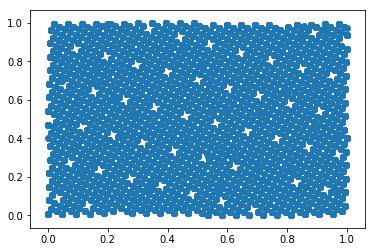

In [8]:
n = 10000
x = normal(n,0)
y = normal(n,2452.325345)


plt.scatter(x,y)

[0.         0.21119342 0.59407407 ... 0.40576132 0.21481481 0.        ] [0.59407407 0.1726749  0.51176955 ... 0.97794239 0.85613169 0.        ]


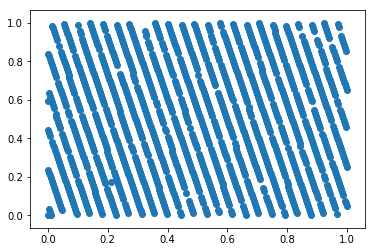

In [9]:
n = 1400
x = np.zeros(n)
y = np.zeros(n)
for i in range(n-1): 
    x[i] = normal_rec(i)
    y[i] = normal_rec(i+2)

print(x,y)
plt.scatter(x,y)

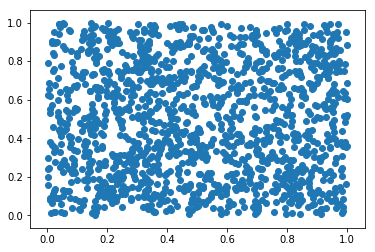

In [10]:
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x,y)

In [11]:
def dice(n):
    I_0 = 0.1
    norm = normal(n,0.1)
    dice = np.zeros(n)
    for i in range(n):
        dice[i] = int(norm[i]*6+1)
      #  print(dice[i])
    return dice

In [12]:
dice(10)

array([1., 2., 5., 5., 2., 2., 5., 2., 4., 3.])

(array([ 2721.,  2723.,  7486., 10204., 19729., 20407., 11564., 14285.,
         8841.,  2040.]),
 array([24. , 26.7, 29.4, 32.1, 34.8, 37.5, 40.2, 42.9, 45.6, 48.3, 51. ]),
 <a list of 10 Patch objects>)

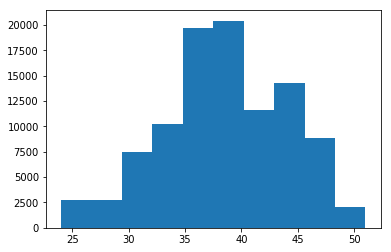

In [21]:
n = 100000
y = np.zeros(n*10)
y = dice(n*10)
hist = np.zeros(n)

for i in range(n):
    hist[i] = np.sum(y[i*10:(10*i+11)])

plt.hist(hist)

In [32]:
def f(x,a):
    return 2/a**2*x

def g(x,a):
    return 4*x/x

def rn(n,a,I_0):
    norm = normal(n,I_0)#np.random.rand(n)#normal(n,I)
    rej = np.zeros(n)
    for i in range(n-1):
        rej[i] = norm[i]
    return rej

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


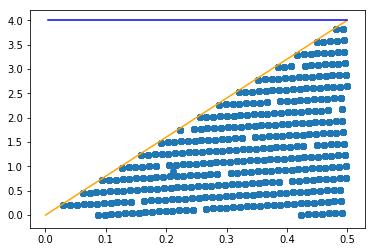

In [33]:
n = 10000
a=0.5


x = np.linspace(0,a,100)
plt.plot(x,f(x,a),"orange")
plt.plot(x,g(x,a),"blue")

x = rn(n,a,0)
y = rn(n,a,1)
y_2 = y*g(y,a)
f = f(x,a)
y_n = np.array([])
x_n = np.array([])

for i in range(len(y)):
    if y_2[i]<f[i] and x[i]<a: 
        y_n = np.append(y_n,y_2[i])
        x_n = np.append(x_n,x[i])

plt.scatter(x_n,y_n)

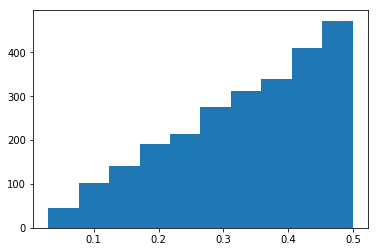

In [34]:
n, bins, patches = plt.hist(x_n, bins=10)


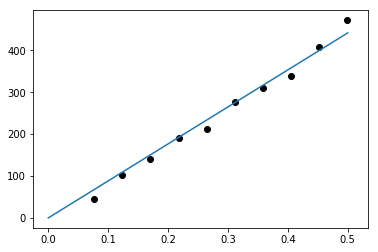

In [41]:
plt.scatter(bins[1:],n,color="black")

def f_2(x,m):
    return m*x

lin = np.linspace(0,0.5,100)
popt,pcov = curve_fit(f_2,bins[1:],n,p0=[2000])

plt.plot(lin,f_2(lin,*popt))

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


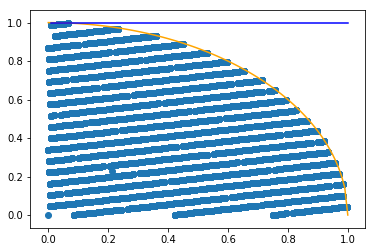

In [52]:
def f(x):
    return np.sqrt(1-x**2)

def g(x,a):
    return 1*x/(x)

n = 10000
a=1

x = np.linspace(0,a,100)
plt.plot(x,f(x ),"orange")
plt.plot(x,g(x,a),"blue")

x = rn(n,a,0)
y = rn(n,a,1)
y_2 = y*g(y,a)
f = f(x)
y_n = np.array([])
x_n = np.array([])

for i in range(len(y)):
    if y_2[i]<f[i] and x[i]<a: 
        y_n = np.append(y_n,y_2[i])
        x_n = np.append(x_n,x[i])

plt.scatter(x_n,y_n)

In [53]:
pi = 4*len(x_n)/len(x)
print(pi)

3.14


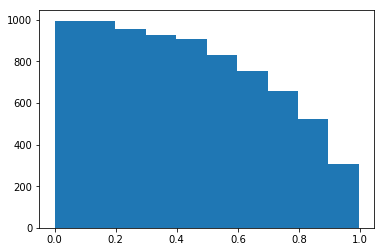

In [54]:
n, bins, patches = plt.hist(x_n, bins=10)

<ErrorbarContainer object of 3 artists>

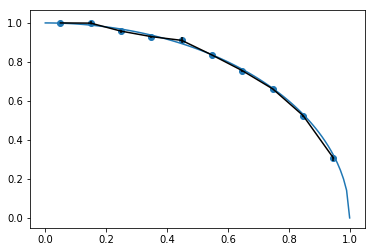

In [55]:
bins_n = bins+(bins[1]-bins[2])/2

plt.scatter(bins_n[1:],n/n[0])

def f(x,a,b,d):
    return abs(a*np.sqrt(d-b*x**2))

x = np.linspace(0,1,100)
x_bin = f(bins_n[1:],1,1,1)
err = abs(n/n[0]-x_bin)

plt.plot(x,f(x,1,1,1))
plt.errorbar(bins_n[1:],n/n[0],yerr=err, color="black")

0.07924333700465952


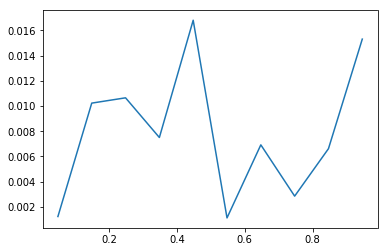

In [56]:
plt.plot(bins_n[1:],err)

chi_2 = np.sum((n/n[0]-x_bin)**2/err)
print(chi_2)

0.07786739917147678

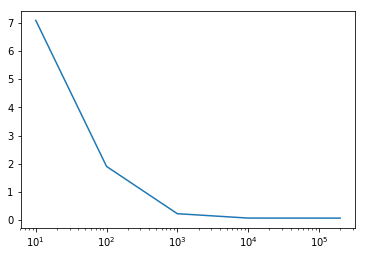

In [57]:
chi = np.array([7.0786377526018605,1.9080751827909874,0.23467275621709566,0.07924333700465952,0.07871097029905155,0.07786739917147678])
n = np.array([10,100,1000,10000,100000,200000])

plt.plot(n,chi)
plt.xscale("log")